<a href="https://colab.research.google.com/github/kartikbatra056/AllAboutTimeSeries/blob/main/Baseline_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Dataset From kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d 'rohanrao/nifty50-stock-market-data'

 44% 8.00M/18.0M [00:00<00:00, 77.1MB/s]
100% 18.0M/18.0M [00:00<00:00, 88.5MB/s]


In [5]:
!unzip '/content/nifty50-stock-market-data.zip'

Archive:  /content/nifty50-stock-market-data.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.csv            
  inflating: INFY.csv                
 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data analysis 

In [2]:
# Load Reliance dataset
df=pd.read_csv('/content/RELIANCE.csv',parse_dates=['Date'])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
df.describe(include='all')

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5184,5184,5184,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5.184000e+03,5.184000e+03,2.334000e+03,4.670000e+03,4670.000000
unique,5184,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2007-09-10 00:00:00,RELIANCE,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,5184,5184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2000-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,987.786950,989.319367,1003.356231,973.918981,987.975174,988.138310,988.720230,5.415171e+06,5.624868e+14,1.350124e+05,2.222530e+06,0.436906
std,NaN,NaN,NaN,556.920215,558.434355,567.971926,546.551339,556.899904,557.018527,557.138677,4.804231e+06,7.660574e+14,1.181286e+05,1.834661e+06,0.145468
min,NaN,NaN,NaN,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,NaN,NaN,NaN,560.412500,563.137500,572.862500,553.512500,561.325000,561.450000,561.632500,2.813994e+06,2.168086e+14,7.104150e+04,1.177226e+06,0.324050


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5184 non-null   datetime64[ns]
 1   Symbol              5184 non-null   object        
 2   Series              5184 non-null   object        
 3   Prev Close          5184 non-null   float64       
 4   Open                5184 non-null   float64       
 5   High                5184 non-null   float64       
 6   Low                 5184 non-null   float64       
 7   Last                5184 non-null   float64       
 8   Close               5184 non-null   float64       
 9   VWAP                5184 non-null   float64       
 10  Volume              5184 non-null   int64         
 11  Turnover            5184 non-null   float64       
 12  Trades              2334 non-null   float64       
 13  Deliverable Volume  4670 non-null   float64     

In [5]:
df.set_index(['Date'],inplace=True)
df.sort_index(inplace=True)

In [6]:
import plotly.express as px
def interactive_plot(data,x_col=None,y_col='VWAP',title=None):
    if x_col is None:
           x_col=data.index
    fig=px.line(data,x=x_col,y=y_col,title=title)
    fig.show()

In [7]:
# Looking for Duplicates
df.duplicated().sum()
df['Pct_change']=df['VWAP'].pct_change()

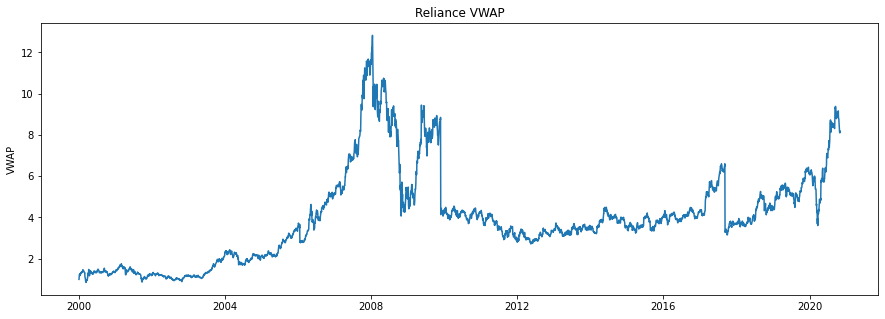

In [8]:
# Visualize VWAP
plt.figure(figsize=(15,5))
plt.plot(df['VWAP']/df['VWAP'][0])
plt.title('Reliance VWAP')
plt.ylabel('VWAP')
plt.show()

In [9]:
# plot interactive plot
interactive_plot(df,title='Vwap interactive plot')

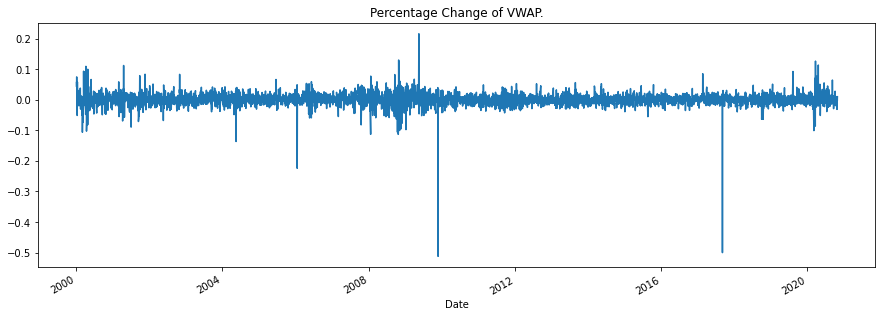

In [10]:
# Visualize Percentage Change of VWAP
plt.figure(figsize=(15,5))
df['Pct_change'].plot()
plt.title('Percentage Change of VWAP.')
plt.show()

In [11]:
interactive_plot(df,y_col='Pct_change',title='PCT_change Vwap interactive plot')

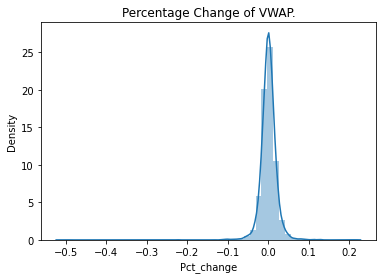

In [12]:
sns.distplot(df['Pct_change'])
plt.title('Percentage Change of VWAP.')
plt.show()

In [13]:
df['Yearly']=df.index.year
mean_month=df.groupby(['Yearly']).median()['VWAP']
interactive_plot(mean_month,title='Yearwise interactive plot')

In [14]:
df['Month']=df.index.month
mean_month=df.groupby(['Month']).median()['VWAP']
interactive_plot(mean_month,title='Monthwise interactive plot')

In [15]:
df['Quarter']=df.index.quarter
mean_Quarter=df.groupby(['Quarter']).median()['VWAP']
interactive_plot(mean_Quarter,title='Quarter plot')

In [20]:
train_df,test_df=df[:int(df.shape[0]*0.75)],df[-int(df.shape[0]*0.25):]
train_df.shape,test_df.shape

((3888, 18), (1296, 18))

In [22]:
from sklearn.metrics import mean_squared_error
def MAPE(pred,target):
    mape=np.mean(np.abs(target-pred)/target)*100
    return mape

# Baseline Model

### Simplest model we can have is 